<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/Diamond/diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as SS
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RFR
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

In [29]:
data = pd.read_csv('diamonds.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [30]:
#clean
data = data[(data != 0).all(1)]
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [31]:
#create volume column
data['volume']=data['x']*data['y']*data['z']
data=data.drop(columns=['x','y','z'])

In [32]:
print(data.color.unique())
print(data.cut.unique())
print(data.clarity.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [33]:
#pseudo-label-encoding
new_cut = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4,'Ideal':5}
data['cut'] = data['cut'].map(new_cut);
new_color = {'J':1,'I':2, 'H':3,'G':4,'F':5,'E':6,'D':7}
data['color'] = data['color'].map(new_color);
new_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
data['clarity'] = data['clarity'].map(new_clarity);

In [34]:
Y = data['price']
data = data.drop(columns=['price'])
data.head(5)

,carat,cut,color,clarity,depth,table,volume
0,0.23,5,6,2,61.5,55.0,38.202030
1,0.21,4,6,3,59.8,61.0,34.505856
2,0.23,2,6,5,56.9,65.0,38.076885
3,0.29,4,2,4,62.4,58.0,46.724580
4,0.31,2,1,2,63.3,58.0,51.917250


In [35]:
ss = SS()
data2 = data.copy()
data2[['carat','table','volume','cut','depth']]=ss.fit_transform(data2[['carat','table','volume','cut','depth']])
data = pd.DataFrame(data2, columns = data.columns)

In [36]:
#split
trainX, testX, trainY, testY = tts(data,Y,test_size=0.2, random_state=42)

In [41]:
#create archs
lr = LR()
lr.fit(trainX,trainY)
rfr = RFR()
rfr.fit(trainX,trainY)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
#predict
lpredictions = lr.predict(testX)
rpredictions = rfr.predict(testX)


In [51]:
#function to visualize accuracy
def plot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Predicted Price', ylabel = 'Actual Price - Predicted Price', title = 'Accuracy Visualization')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)



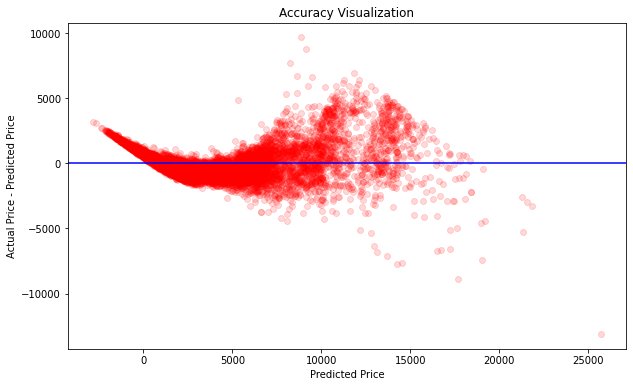

In [52]:
plot(testY, lpredictions, 'red', 'blue')

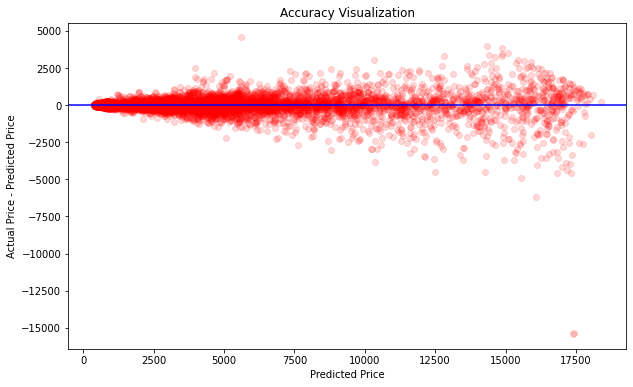

In [53]:
plot(testY,rpredictions,'red','blue')